# Project 02 - Image Processing

## Student Information

- Full name: Nguyễn Thế Hiển
- Student ID: 22127107
- Class: 22CLC08

## Required Libraries

In [8]:
# IMPORT YOUR LIBS HERE
import numpy as np
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

## Function Definitions

In [48]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    return Image.open(img_path)

def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img : <your type>
        Image
    '''

    # YOUR CODE HERE
    plt.imshow(img)
    plt.axis('off')
    plt.show() 

def save_img(img, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img : <your type>
        Image
    img_path : str
        Path of image
    '''

    # YOUR CODE HERE
    img.save(img_path)

#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE
def change_brightness(img, factor):
    arr = np.array(img)
    arr = np.clip(arr * factor, 0, 255).astype(np.uint8)
    return Image.fromarray(arr)

def change_contrast(img, factor):
    arr = np.array(img)
    mean = np.mean(arr, axis=(0, 1), keepdims=True)
    arr = np.clip((arr - mean) * factor + mean, 0, 255).astype(np.uint8)
    return Image.fromarray(arr)

def flip_image(img, direction):
    if direction == 'horizontal':
        return img.transpose(Image.FLIP_LEFT_RIGHT)
    elif direction == 'vertical':
        return img.transpose(Image.FLIP_TOP_BOTTOM)
    return img

def convert_RGB_to_grayscale(image):
    image_matrix = np.array(image)
    new_image = image.copy()
    height, width, channels = image_matrix.shape 

    for y in range(height):
        for x in range(width):
            coordinate = x, y
            red, green, blue = image.getpixel(coordinate)
            grey_scale = int(0.299 * red + 0.587 * green + 0.114 * blue)
            new_image.putpixel((x, y), (grey_scale, grey_scale, grey_scale))

    return new_image

def convert_RGB_to_sepia(image):
    COLOR_WEIGHT_SEPIA = [[0.393, 0.769, 0.189],
                          [0.349, 0.686, 0.168],
                          [0.272, 0.534, 0.131]]

    img_arr = np.array(image).astype(np.float32)
    color_weight = np.array(COLOR_WEIGHT_SEPIA)
    sepia_array = np.clip(np.matmul(img_arr, color_weight.T), a_min=0, a_max=255)
    sepia_img = Image.fromarray(np.uint8(sepia_array))
    return sepia_img

def blur_image(img):
    arr = np.array(img)
    kernel = np.ones((5, 5)) / 25
    result = np.zeros_like(arr)
    if len(arr.shape) == 2:  
        result = np.clip(np.convolve(arr.flatten(), kernel.flatten(), 'same').reshape(arr.shape), 0, 255)
    else:  
        for i in range(3):
            result[:, :, i] = np.clip(np.convolve(arr[:, :, i].flatten(), kernel.flatten(), 'same').reshape(arr[:, :, i].shape), 0, 255)
    return Image.fromarray(result.astype(np.uint8))

def sharpen_image(img):
    arr = np.array(img)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    result = np.zeros_like(arr)
    if len(arr.shape) == 2:  
        result = np.clip(np.convolve(arr.flatten(), kernel.flatten(), 'same').reshape(arr.shape), 0, 255)
    else:  
        for i in range(3):
            result[:, :, i] = np.clip(np.convolve(arr[:, :, i].flatten(), kernel.flatten(), 'same').reshape(arr[:, :, i].shape), 0, 255)
    return Image.fromarray(result.astype(np.uint8))

def crop_center(img, size):
    width, height = img.size
    new_width, new_height = size
    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2
    return img.crop((left, top, right, bottom))

def crop_to_ellipse(img):
    width, height = img.size
    mask = Image.new('L', (width, height), 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0, width, height), fill=255)
    result = Image.new('RGB', (width, height))
    result.paste(img, (0, 0), mask)
    return result

def crop_to_double_ellipse(img):
    width, height = img.size
    mask = Image.new('L', (width, height), 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse([(0, height // 4), (width, 3 * height // 4)], fill=255)
    draw.ellipse([(width // 4, 0), (3 * width // 4, height)], fill=255)
    result = Image.new('RGB', (width, height))
    result.paste(img, (0, 0), mask)
    return result

def resize_image(img, factor):
    width, height = img.size
    new_size = (int(width * factor), int(height * factor))
    return img.resize(new_size, Image.LANCZOS)

<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

In [49]:
# YOUR CODE HERE
def apply_all_functions(img, img_path):
    # Store the original image
    original_img = img.copy()

    # Change brightness
    result = change_brightness(original_img, 1.5)
    save_img(result, img_path.split('.')[0] + '_brightness.png')
    show_img(result)
    
    # Change contrast
    result = change_contrast(original_img, 1.5)
    save_img(result, img_path.split('.')[0] + '_contrast.png')
    show_img(result)
    
    # Flip image horizontal
    result_horizontal = flip_image(original_img, 'horizontal')
    save_img(result_horizontal, img_path.split('.')[0] + '_flip_horizontal.png')
    show_img(result_horizontal)
    
    # Flip image vertical
    result_vertical = flip_image(original_img, 'vertical')
    save_img(result_vertical, img_path.split('.')[0] + '_flip_vertical.png')
    show_img(result_vertical)
    
    # Convert to grayscale
    grayscale_result = convert_RGB_to_grayscale(original_img)
    save_img(grayscale_result, img_path.split('.')[0] + '_grayscale.png')
    show_img(grayscale_result)
    
    # Convert to sepia
    sepia_result = convert_RGB_to_sepia(original_img)
    save_img(sepia_result, img_path.split('.')[0] + '_sepia.png')
    show_img(sepia_result)
    
    # Blur image
    blurred_result = blur_image(original_img)
    save_img(blurred_result, img_path.split('.')[0] + '_blur.png')
    show_img(blurred_result)
    
    # Sharpen image
    sharpened_result = sharpen_image(original_img)
    save_img(sharpened_result, img_path.split('.')[0] + '_sharpen.png')
    show_img(sharpened_result)
    
    # Crop center
    cropped_center_result = crop_center(original_img, (200, 200))
    save_img(cropped_center_result, img_path.split('.')[0] + '_crop_center.png')
    show_img(cropped_center_result)
    
    # Crop to ellipse
    ellipse_result = crop_to_ellipse(original_img)
    save_img(ellipse_result, img_path.split('.')[0] + '_crop_ellipse.png')
    show_img(ellipse_result)
    
    # Crop to double ellipse
    double_ellipse_result = crop_to_double_ellipse(original_img)
    save_img(double_ellipse_result, img_path.split('.')[0] + '_crop_double_ellipse.png')
    show_img(double_ellipse_result)
    
    # Resize image (2x zoom in)
    resized_result = resize_image(original_img, 2)
    save_img(resized_result, img_path.split('.')[0] + '_resize_2x.png')
    show_img(resized_result)
    
    # Resize image (0.5x zoom out)
    resized_result = resize_image(original_img, 0.5)
    save_img(resized_result, img_path.split('.')[0] + '_resize_0.5x.png')
    show_img(resized_result)

## Main FUNCTION

In [55]:
# YOUR CODE HERE
def main():
    img_path = input("Enter the image file name: ")
    img = read_img(img_path)
    original_img = img.copy()  

    while True:
        print("\nChoose an option:")
        print("0: Apply all transformations")
        print("1: Change brightness")
        print("2: Change contrast")
        print("3: Flip image (horizontal/vertical)")
        print("4: Convert RGB to grayscale/sepia")
        print("5: Blur/Sharpen image")
        print("6: Crop image (center)")
        print("7: Crop image to shape (ellipse/double ellipse)")
        print("8: Resize image (2x zoom in / 0.5x zoom out)")
        print("9: Exit")
        
        choice = int(input("Enter your choice: "))
        
        if choice == 9:
            print("Exiting the program.")
            break

        if choice == 0:
            apply_all_functions(original_img, img_path)
            break

        result = original_img.copy()  

        if choice == 1:
            factor = float(input("Enter brightness factor: "))
            result = change_brightness(result, factor)
            save_img(result, img_path.split('.')[0] + '_brightness.png')
            show_img(result)
        
        elif choice == 2:
            factor = float(input("Enter contrast factor: "))
            result = change_contrast(result, factor)
            save_img(result, img_path.split('.')[0] + '_contrast.png')
            show_img(result)
        
        elif choice == 3:
            direction = input("Enter flip direction (horizontal/vertical): ")
            if direction in ['horizontal', 'vertical']:
                result = flip_image(result, direction)
                save_img(result, img_path.split('.')[0] + f'_flip_{direction}.png')
                show_img(result)
            else:
                print("Invalid direction! Please enter 'horizontal' or 'vertical'.")
        
        elif choice == 4:
            mode = input("Enter mode (grayscale/sepia): ")
            if mode == 'grayscale':
                result = convert_RGB_to_grayscale(result)
                save_img(result, img_path.split('.')[0] + '_grayscale.png')
                show_img(result)
            elif mode == 'sepia':
                result = convert_RGB_to_sepia(result)
                save_img(result, img_path.split('.')[0] + '_sepia.png')
                show_img(result)
        
        elif choice == 5:
            action = input("Enter action (blur/sharpen): ")
            if action == 'blur':
                result = blur_image(result)
                save_img(result, img_path.split('.')[0] + '_blur.png')
                show_img(result)
            elif action == 'sharpen':
                result = sharpen_image(result)
                save_img(result, img_path.split('.')[0] + '_sharpen.png')
                show_img(result)
        
        elif choice == 6:
            new_width = int(input("Enter new width: "))
            new_height = int(input("Enter new height: "))
            result = crop_center(result, (new_width, new_height))
            save_img(result, img_path.split('.')[0] + '_crop_center.png')
            show_img(result)
        
        elif choice == 7:
            shape = input("Enter shape (ellipse/double ellipse): ")
            if shape == 'ellipse':
                result = crop_to_ellipse(result)
                save_img(result, img_path.split('.')[0] + '_crop_ellipse.png')
                show_img(result)
            elif shape == 'double ellipse':
                alpha = float(input("Enter the angle alpha in degrees: ")) * np.pi / 180
                result = crop_to_double_ellipse(result, alpha)
                save_img(result, img_path.split('.')[0] + '_crop_double_ellipse.png')
                show_img(result)
        
        elif choice == 8:
            zoom = input("Enter zoom type (in/out): ")
            if zoom == 'in':
                factor = 2
                result = resize_image(result, factor)
                save_img(result, img_path.split('.')[0] + f'_resize_{factor}x.png')
                show_img(result)
            elif zoom == 'out':
                factor = 0.5
                result = resize_image(result, factor)
                save_img(result, img_path.split('.')[0] + f'_resize_{factor}x.png')
                show_img(result)
            else:
                print("Invalid zoom type! Please enter 'in' or 'out'.")

        print("Processing complete! You can choose another function or exit.")
        
        img = result  
        
        


Choose an option:
0: Apply all transformations
1: Change brightness
2: Change contrast
3: Flip image (horizontal/vertical)
4: Convert RGB to grayscale/sepia
5: Blur/Sharpen image
6: Crop image (center)
7: Crop image to shape (ellipse/double ellipse)
8: Resize image (2x zoom in / 0.5x zoom out)
9: Exit


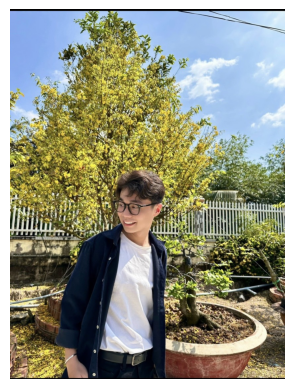

Processing complete! You can choose another function or exit.

Choose an option:
0: Apply all transformations
1: Change brightness
2: Change contrast
3: Flip image (horizontal/vertical)
4: Convert RGB to grayscale/sepia
5: Blur/Sharpen image
6: Crop image (center)
7: Crop image to shape (ellipse/double ellipse)
8: Resize image (2x zoom in / 0.5x zoom out)
9: Exit


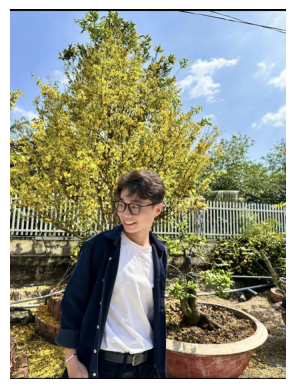

Processing complete! You can choose another function or exit.

Choose an option:
0: Apply all transformations
1: Change brightness
2: Change contrast
3: Flip image (horizontal/vertical)
4: Convert RGB to grayscale/sepia
5: Blur/Sharpen image
6: Crop image (center)
7: Crop image to shape (ellipse/double ellipse)
8: Resize image (2x zoom in / 0.5x zoom out)
9: Exit
Exiting the program.


In [57]:
# Call main function
if __name__ == "__main__":
    main()